In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
#avaliacoes = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')
avaliacoes = pd.read_csv('ratings.csv')
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

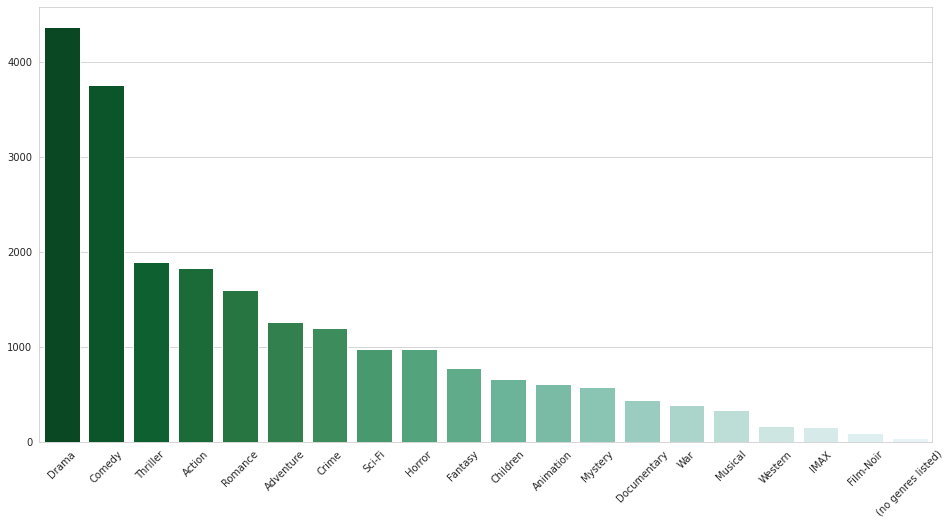

In [3]:
quantidade_generos = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

sns.set_style('whitegrid')

plt.figure(figsize=(16,8))

sns.barplot(x=quantidade_generos.index,
            y=quantidade_generos.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(quantidade_generos) + 2))
plt.xticks(rotation=45)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')['nota']
  notas_do_filme.plot(kind='hist')
  plt.show()
  return notas_do_filme.describe()

In [5]:
media_dos_filmes = avaliacoes.groupby('filmeId')['nota'].mean()
mediana_dos_filmes = avaliacoes.groupby('filmeId')['nota'].median()

filmes_com_media = filmes.join(media_dos_filmes, on='filmeId')
filmes_com_media.rename(columns={'nota':'notaMedia'}, inplace=True)
filmes_com_media['notaMedia'] = filmes_com_media['notaMedia'].round(2)

filmes_com_media.head()

filmes_com_media.query('notaMedia==3.5')

,filmeId,titulo,generos,notaMedia
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.5
25,26,Othello (1995),Drama,3.5
85,96,In the Bleak Midwinter (1995),Comedy|Drama,3.5
115,140,Up Close and Personal (1996),Drama|Romance,3.5
154,183,Mute Witness (1994),Comedy|Horror|Thriller,3.5
...,...,...,...,...
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5
9736,193579,Jon Stewart Has Left the Building (2015),Documentary,3.5
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5
9739,193585,Flint (2017),Drama,3.5


Dos filmes com nota 3.5 pegarei GoldenEye e Othello, para analisar a distribuição de notas

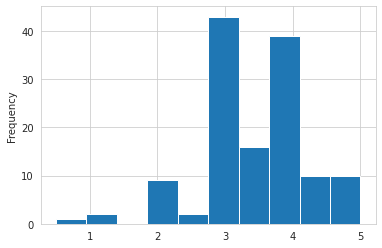

count    132.000000
mean       3.496212
std        0.859381
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [6]:
# GoldenEye
plot_filme(10)

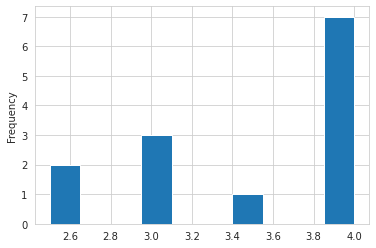

count    13.000000
mean      3.500000
std       0.612372
min       2.500000
25%       3.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: nota, dtype: float64

In [7]:
# Othello
plot_filme(26)

Aqui podemos perceber que apesar dos filmes terem a mesma nota média, GoldenEye teve muito mais avaliacões que Othello, além daquele ter muito mais notas positivas que o último. Algumas pessoas gostaram de Othello mas grande parte também não gostou.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [8]:
quant_votos = avaliacoes.groupby('filmeId')['nota'].count()

filmes_com_quant_votos = filmes_com_media.join(quant_votos, on='filmeId')
filmes_com_quant_votos.rename(columns={'nota':'quantVotos'}, inplace=True)

filmes_mais_votados = filmes_com_quant_votos.sort_values('quantVotos', ascending=False).head(10)
filmes_mais_votados

,filmeId,titulo,generos,notaMedia,quantVotos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


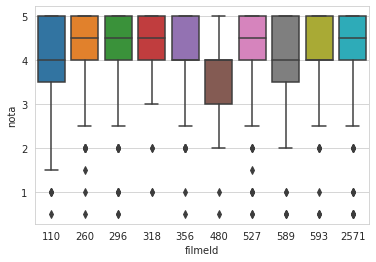

In [9]:
# Criando o boxplot desses filmes

id_dos_filmes_mais_votados = filmes_mais_votados['filmeId'].to_numpy()
sns.boxplot(
    data=avaliacoes.query('filmeId in @id_dos_filmes_mais_votados'),
    x='filmeId',
    y='nota'
)

Conclusão:

Os filmes mais votados, são geralmente os mais bem avaliados (a exceção é o filme 480).

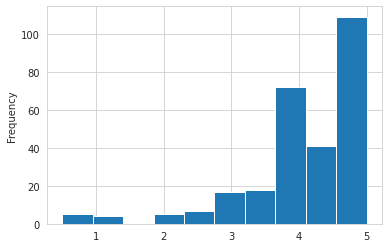

count    278.000000
mean       4.192446
std        0.975243
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [10]:
# Teste do resultado para o filme The Matrix
plot_filme(2571)

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

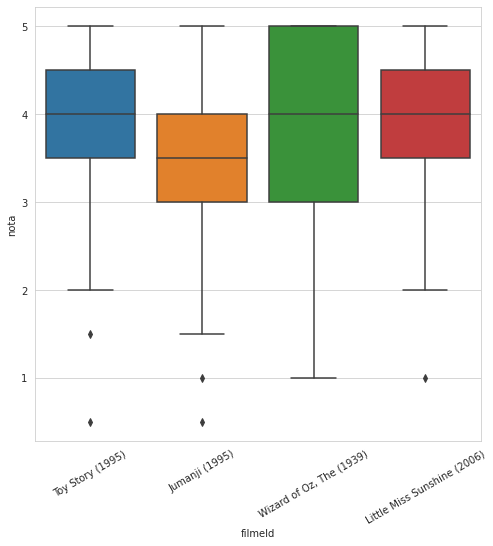

In [11]:
plt.figure(figsize=(8,8))
grafico = sns.boxplot(
    data=avaliacoes.query('filmeId in [1, 2, 919, 46578]'),
    x='filmeId',
    y='nota'
)

titulos = [filme for filme in filmes.query('filmeId in [1, 2, 919, 46578]')['titulo']]
grafico.set_xticklabels(titulos)
plt.xticks(rotation=30)
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [12]:
mediana_dos_filmes = avaliacoes.groupby('filmeId')['nota'].median()
filmes_com_media_e_mediana = filmes_com_media.join(mediana_dos_filmes, on='filmeId')
filmes_com_media_e_mediana.rename(columns={'nota':'notaMediana'}, inplace=True)

filmes_com_media_e_mediana.head()

,filmeId,titulo,generos,notaMedia,notaMediana
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0


In [13]:
filmes_com_media_e_mediana.query('notaMedia == 0.5').head()

,filmeId,titulo,generos,notaMedia,notaMediana
2689,3604,Gypsy (1962),Musical,0.5,0.5
2933,3933,"Killer Shrews, The (1959)",Horror|Sci-Fi,0.5,0.5
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,0.5,0.5
3235,4371,Baby Boy (2001),Crime|Drama,0.5,0.5
3369,4580,Cyborg (1989),Action|Sci-Fi,0.5,0.5


In [14]:
filmes_com_media_e_mediana.query('notaMedia == 3').head()

,filmeId,titulo,generos,notaMedia,notaMediana
14,15,Cutthroat Island (1995),Action|Adventure|Romance,3.0,3.0
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama,3.0,4.0
38,42,Dead Presidents (1995),Action|Crime|Drama,3.0,3.0
45,49,When Night Is Falling (1995),Drama|Romance,3.0,3.0
75,83,Once Upon a Time... When We Were Colored (1995),Drama|Romance,3.0,3.0


In [15]:
filmes_com_media_e_mediana.query('notaMedia == 5').head()

,filmeId,titulo,generos,notaMedia,notaMediana
48,53,Lamerica (1994),Adventure|Drama,5.0,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.0,5.0
405,467,Live Nude Girls (1995),Comedy,5.0,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0,5.0


In [16]:
avaliacoes['nota'].mode()

0    4.0
dtype: float64

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


In [0]:
def boxplot_e_hist(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')['nota']
  
  plt.subplot(1, 2, 1)
  notas_do_filme.plot(kind='hist')
  
  plt.subplot(1, 2, 2)
  sns.boxplot(
      data=avaliacoes.query(f'filmeId=={n}'),
      x='filmeId',
      y='nota'
  )

  plt.tight_layout()
  
  plt.show()

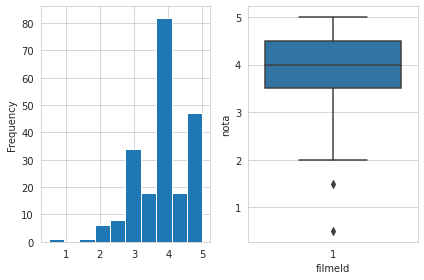

In [18]:
boxplot_e_hist(1)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [19]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract('\((\d{4})\)')
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,notaMedia,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,1995
4,5,Father of the Bride Part II (1995),Comedy,3.07,1995


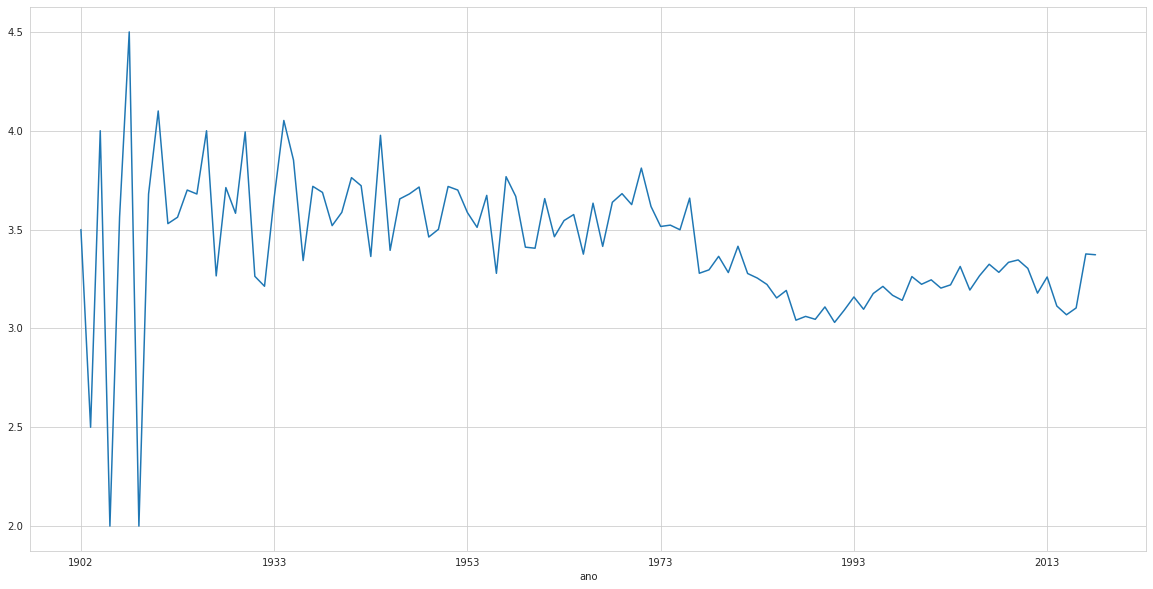

In [21]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['notaMedia'].mean()

plt.figure(figsize=(20,10))
nota_media_por_ano.plot()